This notebook generates the trajectory file required to run the other notebooks in this directory.

The pattern of interest will consist of a transient potential energy sink near the center
followed by a smaller but longer transient diffusivity sink in the bottom right part.

In [1]:
# file to generate
trajectory_file = 'transient_sinks.txt'

## key parameters

print('Times and durations are in seconds')
print('Space coordinates are in micrometers')
print()

total_duration = 10

time_step = 0.05

# average number of trajectories at any given time step
number_of_trajectories = 500

# average trajectory lifetime
trajectory_lifetime = 0.2

# base diffusivity
D0 = 0.25

# minimum diffusivity at the trough of the diffusivity sink
Dmin = 0.05

# maximum decrease in potential energy at the trough of the potential sink
dV = 2

# duration factor of the diffusivity sink
d_sink_half_duration = 4.5

# duration factor of the potential sink
v_sink_half_duration = 3.

# time of the trough of the diffusivity sink
d_sink_time_center = 6.5

# time of the trough of the potential sink
v_sink_time_center = 4.

# generation bounding box (in micrometers)
xmin = ymin = 0
xmax = ymax = 2.

# spatial center of the diffusivity sink
d_sink_space_center = [1.4,0.8]

# spatial center of the potential sink
v_sink_space_center = [0.85,1.1]

# width factor of the diffusivity sink
d_sink_radius = .25

# width factor of the potential sink
v_sink_radius = .35

# freeze the trajectories near the bounding box with a linear diffusivity gradient;
# distance from the border, outside the bounding box, where the diffusion drops down to 0:
d_outer_margin = 0.05
# distance from the border, inside the bounding box, where the diffusion begins to drop down:
d_inner_margin = 0.15


## imports
%matplotlib inline
from tramway.helper import *
from tramway.helper.simulation import *
from math import *
import numpy as np

lower_bound = np.array([xmin, ymin])
upper_bound = np.array([xmax, ymax])

## define the diffusivity and force functions that can be evaluated at any location and time
d_sink_space_center = np.array(d_sink_space_center)
d_sink_radius = np.array(d_sink_radius)
d_s2_r = d_sink_radius * d_sink_radius / (-log(.05)) # squared gaussian scale
d_s2_t = d_sink_half_duration * d_sink_half_duration / (-log(.05))
def diffusivity(r, t):
    # check first whether r is not in the freezing margin
    #margins_dr = min(np.min(r - lower_bound), np.min(upper_bound - r))
    #if margins_dr < d_inner_margin:
    #    return D0 * max(0, margins_dr + d_outer_margin) / (d_inner_margin + d_outer_margin) # freeze
    # sink
    dr, dt = r - d_sink_space_center, t - d_sink_time_center
    D_r = exp(-np.dot(dr, dr) / d_s2_r)
    D_t = exp(-(dt * dt) / d_s2_t)
    d = D0 - (D0 - Dmin) * D_r * D_t
    assert 0 < d
    return d

v_sink_space_center = np.array(v_sink_space_center)
v_sink_radius = np.array(v_sink_radius)
v_s2_r = v_sink_radius * v_sink_radius / (-log(.05)) # squared gaussian scale
v_s2_t = v_sink_half_duration * v_sink_half_duration / (-log(.05))
def force(r, t):
    r, t = r - v_sink_space_center, t - v_sink_time_center
    grad_V = 2. * r / v_s2_r * exp(-np.dot(r, r) / v_s2_r)
    V_t = exp(-(t * t) / v_s2_t)
    f = dV * (-grad_V) * V_t
    return f


## generate the trajectories
trajectories = random_walk(
    diffusivity=diffusivity,
    force=force,
    trajectory_mean_count=number_of_trajectories,
    lifetime_tau=trajectory_lifetime,
    time_step=time_step,
    duration=total_duration,
    full=True,
    box=(xmin, ymin, xmax-xmin, ymax-ymin),
    # minor_step_count=999,# to achieve similar precision as with random_walk_2d
    )
# see also:
# help(random_walk)

print("Dumping the trajectories into file '{}'".format(trajectory_file))
trajectories.to_csv(trajectory_file, sep='\t', header=False, index=False)

print("`trajectories` is a DataFrame with columns 'x', 'y' (spatial coordinates), 't' (time) and 'n' (trajectory index).")
print('Each row is a molecule location.')
print()
print('trajectories = ')
trajectories

Times and durations are in seconds
Space coordinates are in micrometers

Dumping the trajectories into file 'transient_sinks.txt'
`trajectories` is a DataFrame with columns 'x', 'y' (spatial coordinates), 't' (time) and 'n' (trajectory index).
Each row is a molecule location.

trajectories = 


,n,x,y,t
0,1,1.731357,1.130186,0.05
1,1,1.596977,1.344957,0.10
2,1,1.624244,1.364328,0.15
3,1,1.692761,1.195117,0.20
4,1,1.905680,1.284292,0.25
5,1,1.774470,1.443583,0.30
6,1,1.366759,1.561109,0.35
7,2,0.713993,1.544126,0.05
8,2,0.775139,1.464683,0.10
9,2,0.919127,1.418970,0.15


density maps:

segment: 0


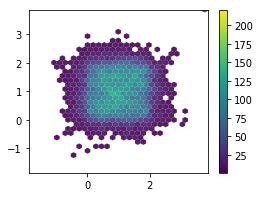

segment: 1


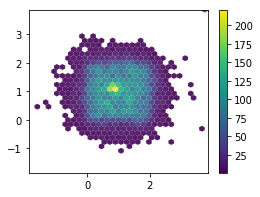

segment: 2


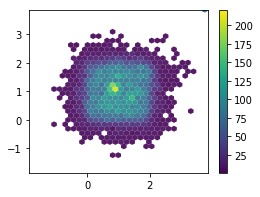

segment: 3


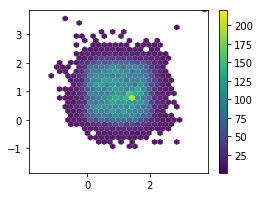

segment: 4


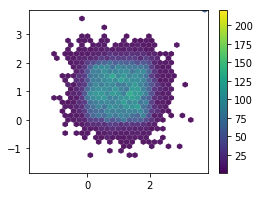

segment: 5


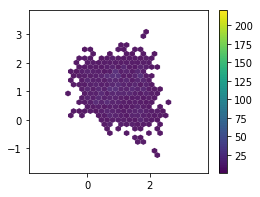

the last segment is populated by trajectories generated before;
no more trajectories are generated


In [2]:
print('density maps:')
print()

cells = tessellate(trajectories, 'hexagon', time_window_duration=2., min_n=2)

maps = infer(cells, 'density', sigma=.01, scale=True)

number_of_segments = len(cells.tessellation.time_lattice)
for segment in range(number_of_segments):
    print('segment: {}'.format(segment))
    map_plot(maps, cells, segment=segment, show=True, title=False, figsize=(4,3))
    
print('''the last segment is populated by trajectories generated before;
no more trajectories are generated''')

diffusity/force maps:

segment: 0


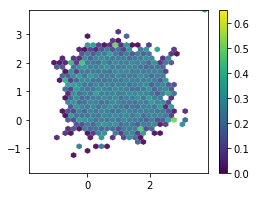

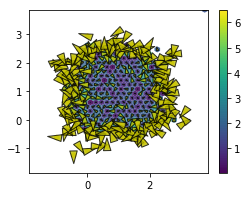

segment: 1


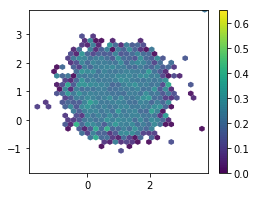

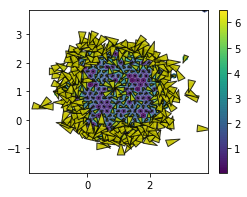

segment: 2


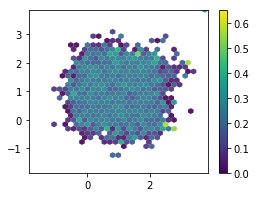

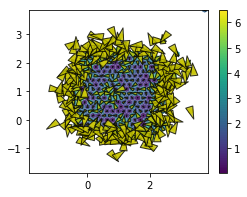

segment: 3


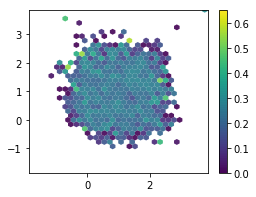

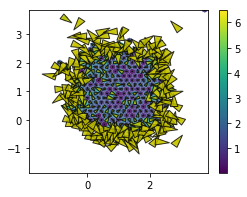

segment: 4


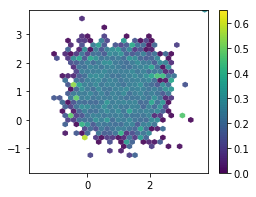

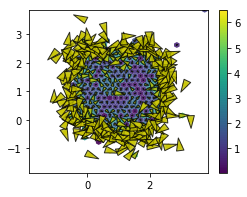

segment: 5


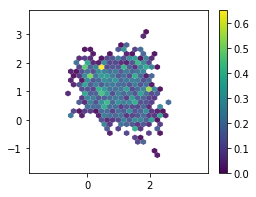

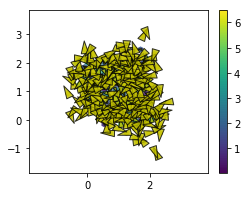

Border effects are strong and the force needs clipping to be plotted.
Outer cells should be ignored.


In [4]:
print('diffusity/force maps:')
print()

maps = infer(cells, 'degraded.df', sigma=.01)

number_of_segments = len(cells.tessellation.time_lattice)
for segment in range(number_of_segments):
    print('segment: {}'.format(segment))
    map_plot(maps, cells, segment=segment, show=True, title=False, figsize=(4,3), clip=dict(force=.6))
    
print('Border effects are strong and the force needs clipping to be plotted.')
print('Outer cells should be ignored.')